In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   astropy.table import Table

In [2]:
gama_d8 = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_ddp_n8.fits')
gama_d8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64
386805,587727944563819000,134.01009244,2.32209878,18.999538,0.19489,4,G09_Y2_021_192,6,21.098183,19.805834,19.002657,18.573671,18.334898,671.3846300853444,39.1348569739141,0.8031769,0.6207474460688747,0,4,-0.043401164231396824,0.13902826958254105,0.1745780060255559,0.4107686751775556,0.5669862107308128,2.12,-0.18904331,-0.4131668,-20.120853245043946,-19.896729767108155,39.120391666674806,38.896268188739015,0.8004608,0.28464481687367604,0.0,-6.9995384,0.007955196992671823,0.0,0 .. 0,386.68240285328096,-407.04411339628757,22.37807623679093,364.4827601571724,229578,0.0,0.25551828754809874,57,0,0
196108,587725073914003977,129.40701904,-0.70191331,19.317492,0.1769,4,G09_Y2_019_103,6,20.896608,19.965784,19.284044,18.873354,18.67871,602.5196376086117,38.899856031056714,0.6817398,0.5468141266713421,0,4,-0.06938452547299719,0.06554115498456703,0.13781159009089128,0.31130577871524984,0.5082456185045476,2.12,-0.17159301,-0.37502798,-19.548583079349967,-19.345148105394813,38.86607461072204,38.66263963676688,0.4825077,0.22304376921442798,0.0,-7.3174915,0.006176633539799811,0.0,0 .. 0,321.63713887036636,-398.2509277608585,-6.594150230345611,362.51425848011877,465143,0.0,0.5138342205803008,9,15,0
3581319,587729150375362743,132.22724598,-1.52302925,17.708998,0.21845,4,G09_Y4_227_197,6,19.991367,18.631165,17.707405,17.242115,16.91901,763.5372292561811,39.4141510882087,0.92375946,0.6722014342809547,0,4,-0.015126542544098703,0.23643148362416533,0.20636152599301677,0.5272372237588918,0.6028837626833436,2.12,-0.2118965,-0.46311396,-21.699618393730333,-21.448400924157312,39.40861612017076,39.15739865059774,2.0910015,0.5321657569147775,0.0,-5.7089977,0.01619295108168265,0.0,1 .. 0,417.0751690395097,-467.3782800437752,-17.073676051976783,421.2810459785523,367739,0.0,0.454151116919431,11,0,0
3583283,587729150375821538,133.29179777,-1.62363597,19.004656,0.07737,4,G09_Y4_239_058,6,20.095257,19.215954,19.001188,18.822033,18.742218,246.19238260163945,36.95637305684218,0.21476555,0.2327932438664232,0,2,-0.10164614078540275,-0.11967383594552983,0.06312904423149192,0.03171773689897445,0.24617685603857214,2.12,-0.07504891,-0.1640244,-17.939797354469707,-17.85082186533015,36.944453192482406,36.85547770334285,0.7953434,0.11292987662789934,0.0,-7.004656,0.0031081360358404123,0.0,0 .. 1,155.22262686091338,-167.57051701918536,-6.630311987187658,150.50776158158976,830593,0.0,0.3441103945447023,5,16,21
301894,587726032229105915,135.59405392,1.2824009,16.884815,0.13108,5,528210091002849280,6,20.099348,17.841904,16.780191,16.346266,15.997567,433.17604316774094,38.183322149649214,1.0617123,0.9774386323843438,0,6,-0.060613110767923827,0.023660521862380823,0.1706670944326003,0.4173594637694922,0.8150198956777566,0.8,-0.1271476,-0.104864,-21.342026427962622,-21.364310026743254,38.226841644027076,38.24912524280771,2.915184,0.38860801596886707,0.0,-4.884815,0.015471772499660577,0.0,1 .. 0,271.2776692189069,-270.20335749543307,8.299088125532368,240.4176447776029,1668290,0.0,0.39073781927975687,15,18,0
418145,587728879258239301,135.12374329,2.57136785,18.704964,0.12964,4,G09_Y1_DX2_383,6,20.994415,19.53

In [32]:
gama_d8_meta = fits.open(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_ddp_n8.fits')[1].header
gama_d8_meta

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  369 / length of dimension 1                          
NAXIS2  =               113687 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   49 / number of table fields                         
TTYPE1  = 'CATAID  '                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'OBJID   '                                                            
TFORM2  = 'K       '                                                            
TTYPE3  = 'RA      '        

In [33]:
gama_d8.dtype.names

('CATAID',
 'OBJID',
 'RA',
 'DEC',
 'R_PETRO',
 'ZGAMA',
 'NQ',
 'SPECID',
 'SURVEY_CLASS',
 'UMAG_DRED_SDSS',
 'GMAG_DRED_SDSS',
 'RMAG_DRED_SDSS',
 'IMAG_DRED_SDSS',
 'ZMAG_DRED_SDSS',
 'LUMDIST',
 'DISTMOD',
 'GMR',
 'REST_GMR_0P1',
 'REST_GMR_0P1_WARN',
 'REST_GMR_0P1_INDEX',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'Q_COLOR_0P0',
 'EQ_ALL_0P0',
 'EQ_COLOR_0P0',
 'MALL_0P0',
 'MCOLOR_0P0',
 'Z_THETA_QALL',
 'Z_THETA_QCOLOR',
 'DELTA_RPETRO_FAINT',
 'ZMAX',
 'ZMAX_WARN',
 'DELTA_RPETRO_BRIGHT',
 'ZMIN',
 'ZMIN_WARN',
 'DDP',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'RANDSEP',
 'RANDMATCH',
 'BOUND_DIST',
 'FILLFACTOR',
 'DDP1_N8',
 'DDP2_N8',
 'DDP3_N8',
 'DDP1_DELTA8',
 'DDP2_DELTA8',
 'DDP3_DELTA8')

In [4]:
zlims = {'DDP1_ZMIN': 0.039069999009370804,\
         'DDP1_ZMAX': 0.2483299970626831,\
         'DDP1_VZ':   6451530.309761727,\
         'DDP1_DENS': 0.005383528919866882,\
         'DDP2_ZMIN': 0.03914999961853027,\
         'DDP2_ZMAX': 0.18308000266551971,\
         'DDP2_VZ':   2679079.7557868413,\
         'DDP2_DENS': 0.009928035902084674,\
         'DDP3_ZMIN': 0.03903000056743622,\
         'DDP3_ZMAX': 0.09973999857902527,\
         'DDP3_VZ':   432372.2344703941,\
         'DDP3_DENS': 0.018396185892331243,\
         'VOL8':      2144.660584850632}

In [5]:
gama_d8 = gama_d8[gama_d8['FILLFACTOR'] > 0.8]

In [6]:
gama_d8['DDP1_DELTA8'] = (gama_d8['DDP1_N8'] / (zlims['VOL8'] * zlims['DDP1_DENS']) / gama_d8['FILLFACTOR']) - 1. 
gama_d8['DDP2_DELTA8'] = (gama_d8['DDP2_N8'] / (zlims['VOL8'] * zlims['DDP2_DENS']) / gama_d8['FILLFACTOR']) - 1. 
gama_d8['DDP3_DELTA8'] = (gama_d8['DDP3_N8'] / (zlims['VOL8'] * zlims['DDP3_DENS']) / gama_d8['FILLFACTOR']) - 1. 

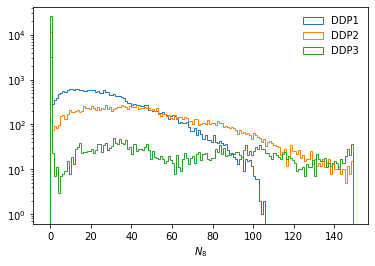

In [9]:
bins=np.arange(-1., 150., 1.)

_ = pl.hist(gama_d8['DDP1_N8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_N8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_N8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$N_8$')
pl.yscale('log')
pl.legend(frameon=False)

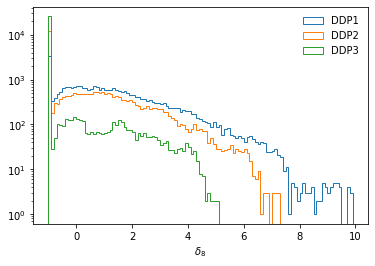

In [10]:
bins=np.arange(-1., 10., 0.1)

_ = pl.hist(gama_d8['DDP1_DELTA8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_DELTA8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_DELTA8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$\delta_8$')
pl.yscale('log')
pl.legend(frameon=False)

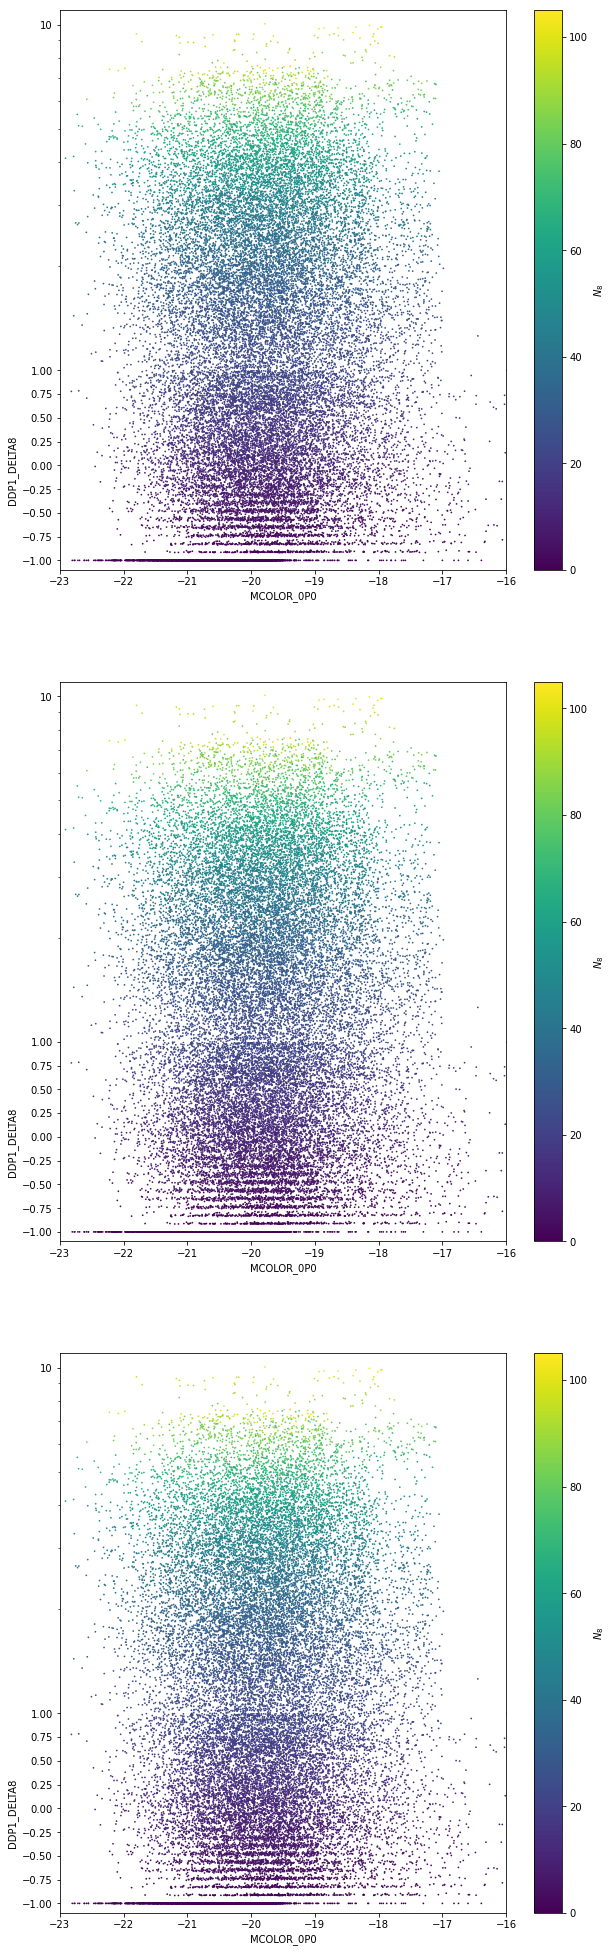

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(10, 35))

for idx, ax in enumerate(axes):
    sc = ax.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP1_DELTA8'], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    ax.set_xlabel('MCOLOR_0P0')
    ax.set_ylabel('DDP1_DELTA8')

    ax.set_xlim(-23., -16.)
    ax.set_ylim(-1.1, 1.)
    
    ax.spines['top'].set_visible(False)
    
    divider = make_axes_locatable(ax)
    
    axLog = divider.append_axes("top", size=5.0, pad=0, sharex=ax)
    axLog.set_yscale('log')
    axLog.set_ylim((1., 11.))
    axLog.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP1_DELTA8'], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    axLog.spines['bottom'].set_visible(False)
    axLog.xaxis.set_ticks_position('top')
    axLog.xaxis.set_visible(False)

    axLog.set_yticks([10.])
    axLog.set_yticklabels(['10'])
    
    ax.set_title('DDP{}'.format(idx+1))

    colorbar = fig.colorbar(sc, ax=ax, label=r'$N_8$')

In [40]:
gama_d8_slice = gama_d8[np.abs(gama_d8['CARTESIAN_Z']) < 5.]

In [41]:
gama_d8_slice

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64
84668,587722983887208685,179.23629748,0.47637588,18.26118,0.13038,4,G12_Y6_060_021,6,19.894318,18.74587,18.164255,17.832947,17.54562,430.65789002975646,38.1706620414019,0.58161545,0.5363635749307286,0,4,-0.08821721822438858,-0.04296534515707039,0.1172065509693491,0.1991889018515434,0.4996330971158526,2.12,-0.12646861,-0.2764056,-19.900219100941918,-19.750282111992142,38.161399978627465,38.01146298967769,1.5388184,0.2726550924435247,0.0,-6.261181,0.007438799648653256,0.0,0 .. 0,380.8849295127261,-8.277443507466858,2.785692899544285,0.8894803741834677,257222,13.71364545359237,1.0080849227718787,67,107,0,4.756414555836067,3.9849952526186545,-1.0
610076,588848900448846629,178.48426634,0.25869109,19.322447,0.09803,4,G12_Y1_DD1_240,6,20.991102,19.859522,19.329205,19.040915,18.951591,316.60669083580655,37.502600442751174,0.5303173,0.5328038410236592,0,4,-0.10463076609913094,-0.10711730060423547,0.10018929511578506,0.13380715674792437,0.4966994448864154,2.12,-0.0950891,-0.20782359,-18.185253814445577,-18.072519325302682,37.50770063756569,37.394966148422796,0.4775524,0.1222585573227392,0.0,-7.322447,0.003442390283698727,0.0,0 .. 1,288.1637635464896,-10.047776772381917,1.0129207951693786,0.2429638516555538,489923,11.520811928148214,0.9931641468566612,1,5,15,-0.91279259848842,-0.7635566728936525,-0.6171894781789422
584992,588848899913023667,180.78429763,-0.06452301,19.66347,0.14092,4,G12_Y1_FND1_177,5,21.082666,20.123625,19.656336,19.326153,19.260588,468.79644462608303,38.354921546565436,0.46728897,0.4086067452369068,0,3,-0.09887746050040944,-0.040195234790050605,0.08535551086537749,0.1594012170435232,0.3932432647691199,2.12,-0.1366924,-0.29875037,-18.640115338108608,-18.478057372114726,38.3035846526838,38.14152668668992,0.13652992,0.15052301669333065,0.0,-7.6634693,0.004147961682257296,0.0,0 .. 0,410.88666010017727,2.1731262771210687,-0.8747120250004312,0.4348821011896242,680375,16.38491141220243,0.9530645615845144,6,10,0,-0.4547404152064618,-0.5072169405709197,-1.0
610668,588848900450091122,181.19967355,0.25232035,19.25733,0.11092,4,G12_Y1_FND1_306,6,20.288557,19.454113,19.221487,18.916784,18.790487,361.50195707883915,37.79055326397902,0.23262596,0.22078518337979428,0,2,-0.1068136185629692,-0.09497284063905254,0.05755081795939623,0.0536509617567254,0.23652581750638177,2.12,-0.107592404,-0.23515038,-18.483181737253815,-18.355623759219796,37.740511678049714,37.612953700015694,0.5426693,0.14495192504032306,0.0,-7.25733,0.003919429853579744,0.0,0 .. 0,325.38028464451895,4.079975243321568,1.1067803725252559,0.35996599340737906,531892,12.886145716011443,0.9875688558884547,38,50,0,2.332656788643665,1.3778294935624182,-1.0
535897,588848898838757705,179.54136242,-0.87112914,19.380539,0.08198,4,G12_Y2_026_339,6,20.108957,19.2658,18.977835,19.00601,18.890728,261.73803528858366,37.08933419049538,0.28796577,0.3042631218038474,0,2,-0.1045134647977748,-0.1208108120654679,0.06345345171963072,0.04748086017720626,0.3039383660785573,2.12,-0.0795206,-0.17379759,-17.69272810373139,-17.59845110926461,37.07326704416108,36.9789

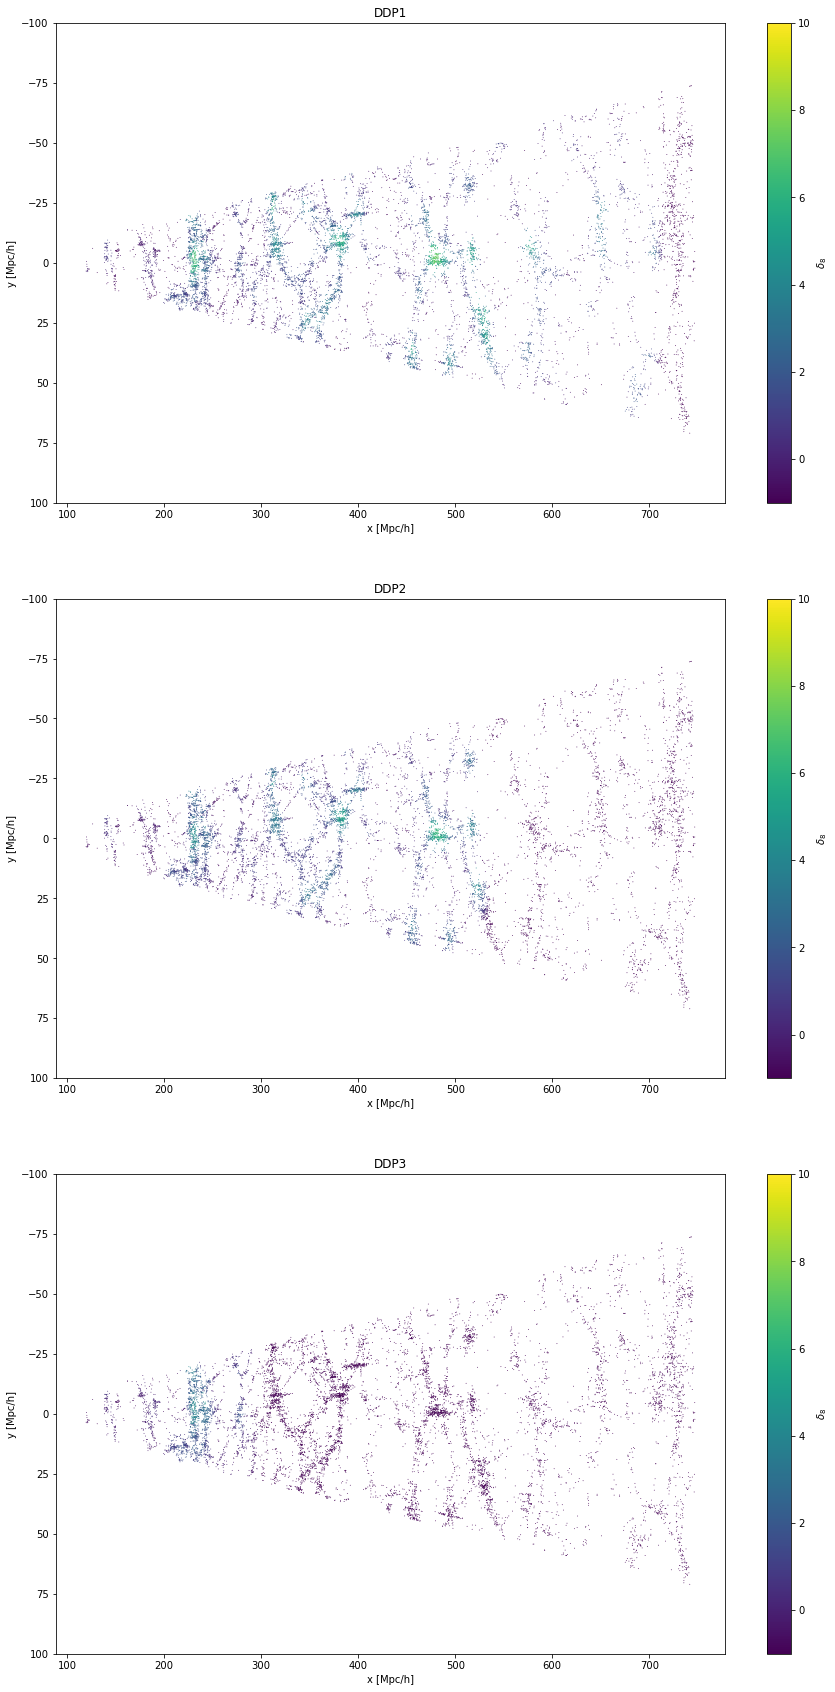

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(15, 30))

for idx in range(3):
    sc = axes[idx].scatter(gama_d8_slice['CARTESIAN_X'],\
                           gama_d8_slice['CARTESIAN_Y'],\
                           c=gama_d8_slice['DDP{}_DELTA8'.format(idx+1)],\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    axes[idx].set_ylim(100., -100.)
    
    colorbar = fig.colorbar(sc, ax=axes[idx], label=r'$\delta_8$')    
    
    axes[idx].set_xlabel('x [Mpc/h]')
    axes[idx].set_ylabel('y [Mpc/h]')
    
    axes[idx].set_title('DDP{}'.format(idx+1))

# Done.